In [3]:
import numpy as np
import pandas as pd

In [6]:
df=pd.read_csv('iris.csv')
df.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
encoder=LabelEncoder()

In [10]:
df['class']=encoder.fit_transform(df['class'])

In [12]:
#Now converting the problem to binary classification problem by removing the setosa rows
#Also deleting two rows
df=df[df['class']!=0][['sepal width','petal length','class']]

In [13]:
df

,sepal width,petal length,class
50,3.2,4.7,1
51,3.2,4.5,1
52,3.1,4.9,1
53,2.3,4.0,1
54,2.8,4.6,1
...,...,...,...
145,3.0,5.2,2
146,2.5,5.0,2
147,3.0,5.2,2
148,3.4,5.4,2


In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

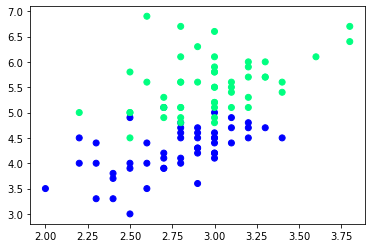

In [15]:
plt.scatter(df['sepal width'],df['petal length'],c=df['class'],cmap='winter')

In [16]:
#Taking only 10 rows for training
df=df.sample(100) #Shuffles the data
df_train=df.iloc[:60,:].sample(10)
df_val=df.iloc[60:80,:].sample(5)
df_test=df.iloc[80:,:].sample(5)

In [17]:
df_train

,sepal width,petal length,class
110,3.2,5.1,2
121,2.8,4.9,2
54,2.8,4.6,1
57,2.4,3.3,1
105,3.0,6.6,2
85,3.4,4.5,1
144,3.3,5.7,2
88,3.0,4.1,1
70,3.2,4.8,1
148,3.4,5.4,2


In [18]:
X_test=df_val.iloc[:,0:2].values # .values converts to arrays
y_test=df_val.iloc[:,-1].values #. values converts to arrays

# Case1- Bagging

In [19]:
df_bag=df_train.sample(8,replace=True) #replace=True indocates that a sample can contain same row multiple times

In [20]:
X=df_bag.iloc[:,0:2]
y=df_bag.iloc[:,-1]

df_bag

,sepal width,petal length,class
54,2.8,4.6,1
110,3.2,5.1,2
57,2.4,3.3,1
105,3.0,6.6,2
121,2.8,4.9,2
144,3.3,5.7,2
121,2.8,4.9,2
88,3.0,4.1,1


In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

from sklearn.metrics import accuracy_score

In [32]:
dt_bag1=DecisionTreeClassifier()

In [34]:
dt_bag1.fit(X,y)

DecisionTreeClassifier()

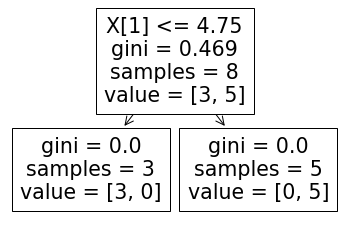

In [36]:
plot_tree(dt_bag1)
plt.show()

In [37]:
def evaluate(clf,X,y):
    clf.fit(X,y)
    plot_tree(clf)
    plt.show()
    y_pred=clf.predict(X_test)
    print(accuracy_score(y_test,y_pred))

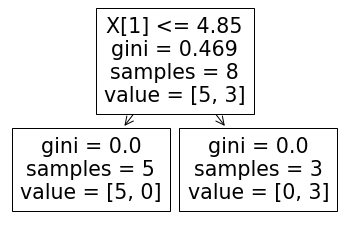

0.8


C:\Users\sayan\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [42]:
df_bag=df_train.sample(8,replace=True)
X=df_bag.iloc[:,0:2]
y=df_bag.iloc[:,-1]

dt_bag2=DecisionTreeClassifier()

evaluate(dt_bag2,X,y)

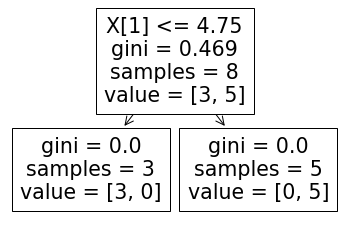

0.8


C:\Users\sayan\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [46]:
df_bag=df_train.sample(8,replace=True)
X=df_bag.iloc[:,0:2]
y=df_bag.iloc[:,-1]

dt_bag3=DecisionTreeClassifier()

evaluate(dt_bag3,X,y)

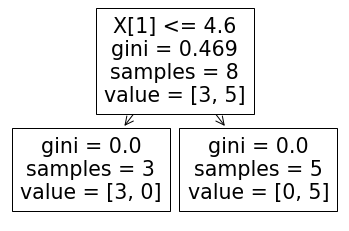

0.6


C:\Users\sayan\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [51]:
df_bag=df_train.sample(8,replace=True)
X=df_bag.iloc[:,0:2]
y=df_bag.iloc[:,-1]

dt_bag4=DecisionTreeClassifier()

evaluate(dt_bag4,X,y)

# Predict

In [52]:
print("predictor 1",dt_bag1.predict(np.array([2.8,4.9]).reshape(1,2)))
print("predictor 2",dt_bag2.predict(np.array([2.8,4.9]).reshape(1,2)))
print("predictor 3",dt_bag3.predict(np.array([2.8,4.9]).reshape(1,2)))
print("predictor 4",dt_bag4.predict(np.array([2.8,4.9]).reshape(1,2)))

predictor 1 [2]
predictor 2 [1]
predictor 3 [2]
predictor 4 [2]


C:\Users\sayan\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\sayan\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\sayan\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\sayan\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
